In [1]:
# SUPPORT VECTOR MACHINE on Mushroom Dataset

# Task 1: EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load dataset
df = pd.read_csv("mushroom.csv")
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [5]:
# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

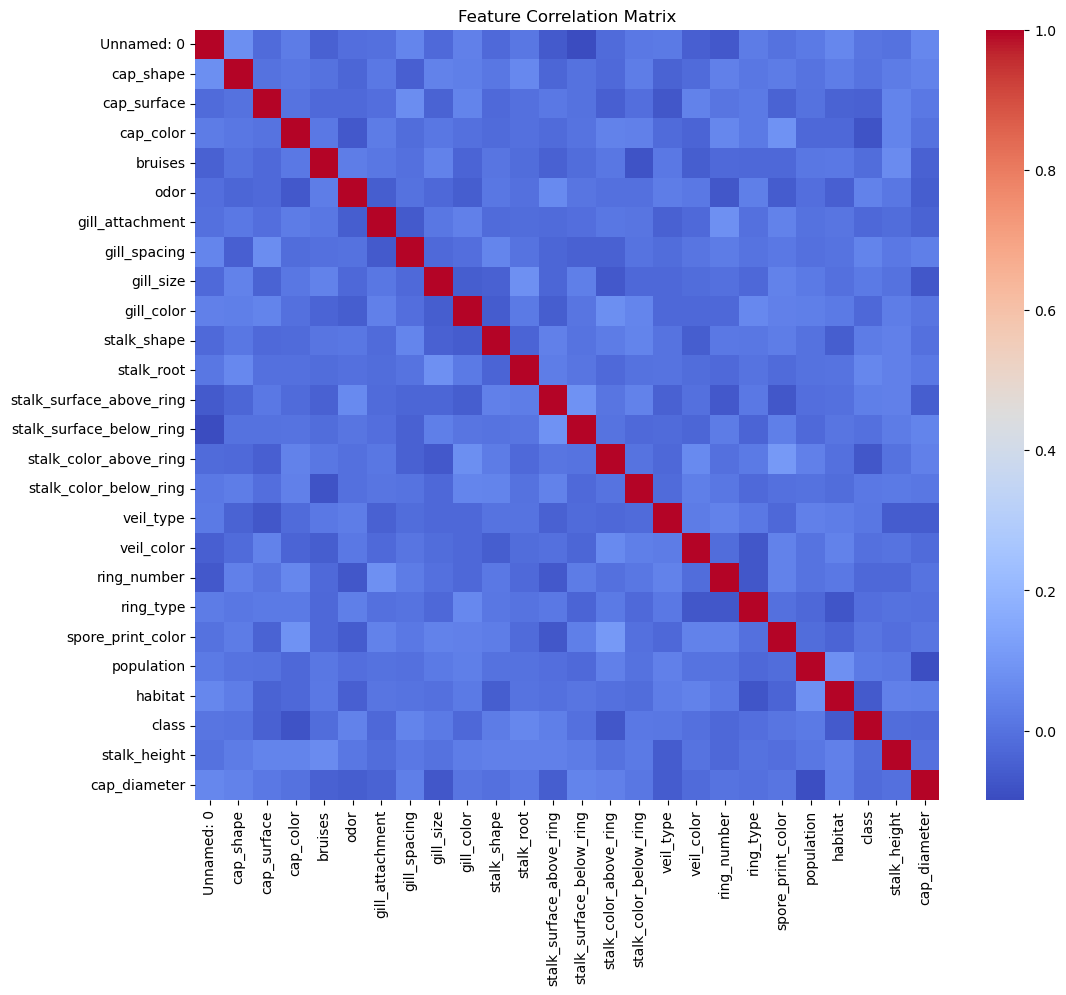

In [6]:
# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
# Task 2: Data Preprocessing
from sklearn.model_selection import train_test_split

X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

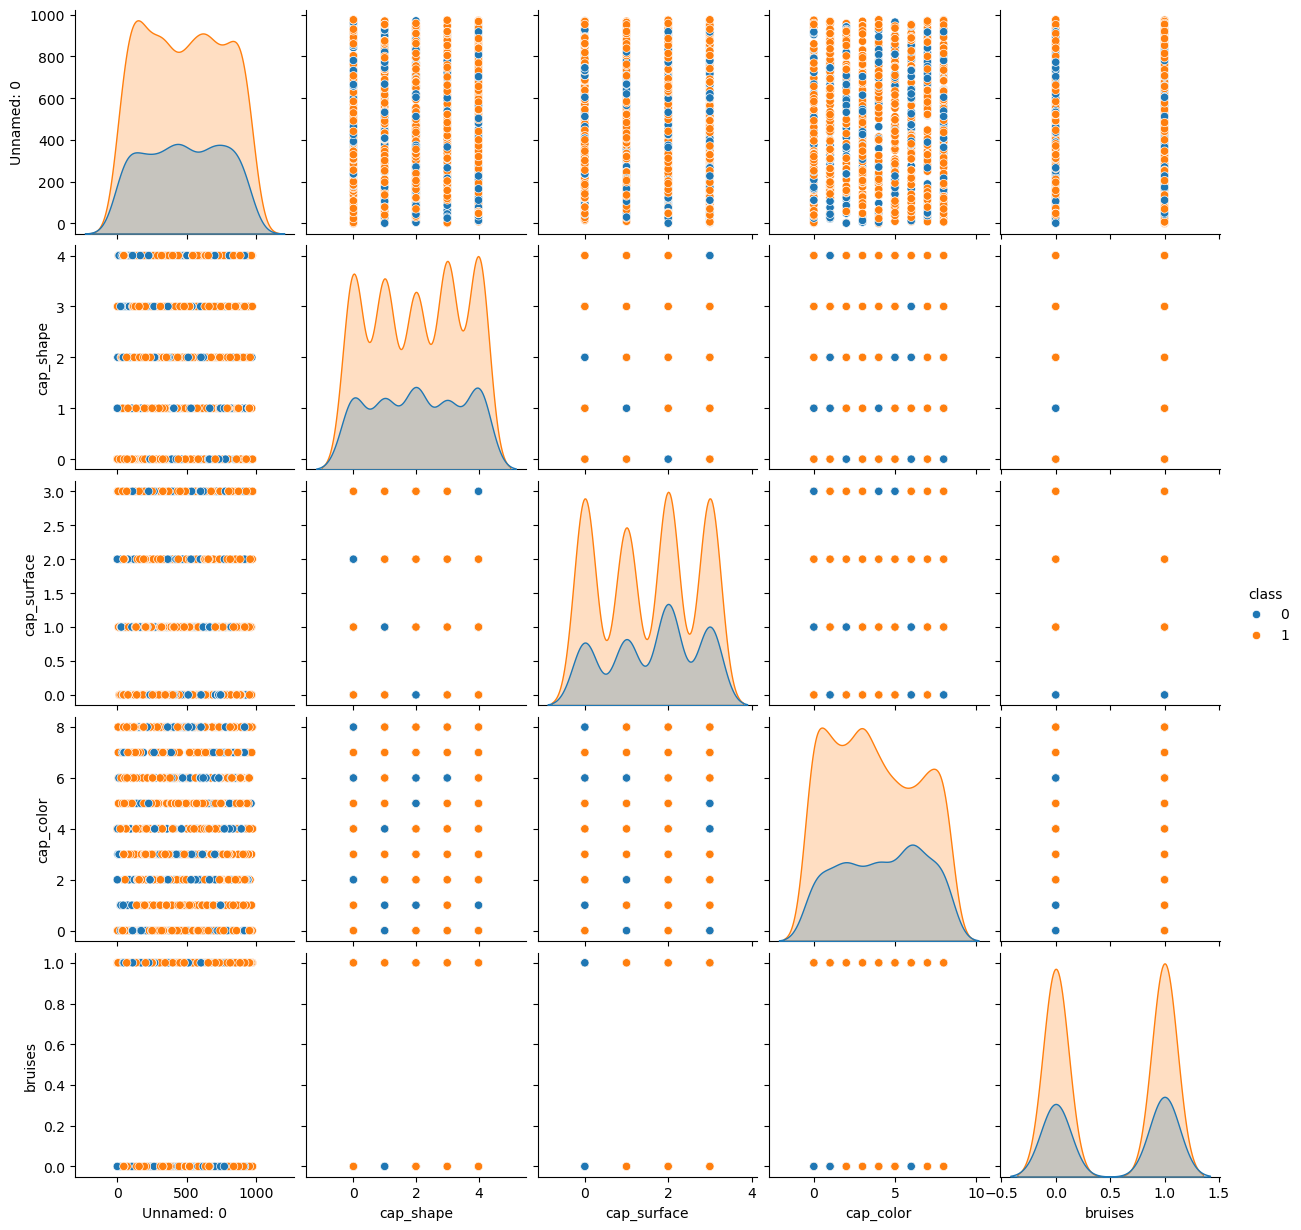

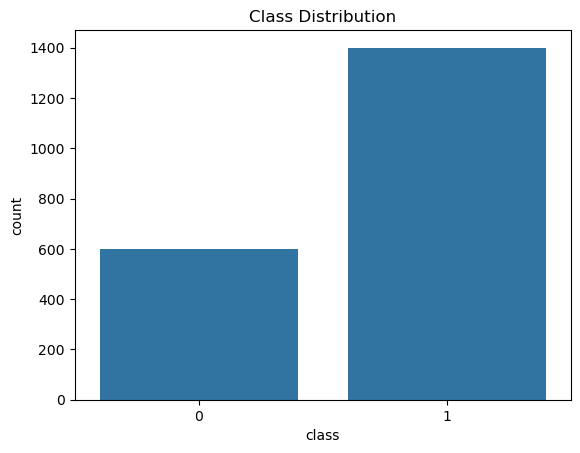

In [8]:
# Task 3: Data Visualization
sns.pairplot(df_encoded.iloc[:, :5].join(y), hue="class")
plt.show()

sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


In [9]:
# Task 4: SVM Implementation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


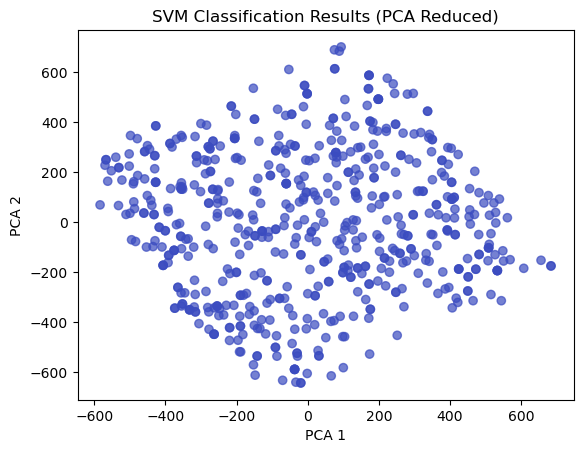

In [10]:
# Task 5: Visualize SVM Results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title("SVM Classification Results (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
# Task 6: Parameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

In [ ]:
# Task 7: Kernel Comparison
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))